In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('C:\Users\Jai\Downloads\world-development-indicators-release-2016-01-28-06-31-53\world-development-indicators\Indicators.csv')
# Create list of unique indicators, indicator codes
Indicator_array =  df[['IndicatorName','IndicatorCode']].drop_duplicates().values

In [4]:
modified_indicators = []
unique_indicator_codes = []
for ele in Indicator_array:
    indicator = ele[0]
    indicator_code = ele[1].strip()
    if indicator_code not in unique_indicator_codes:
        # delete , ( ) from the IndicatorNames
        new_indicator = re.sub('[,()]',"",indicator).lower()
        # replace - with "to" and make all words into lower case
        new_indicator = re.sub('-'," to ",new_indicator).lower()
        modified_indicators.append([new_indicator,indicator_code])
        unique_indicator_codes.append(indicator_code)

Indicators = pd.DataFrame(modified_indicators,columns=['IndicatorName','IndicatorCode'])
Indicators = Indicators.drop_duplicates()
print(Indicators.shape)

(1344, 2)


In [5]:
key_word_dict = {}
key_word_dict['Demography'] = ['population','birth','death','fertility','mortality','expectancy']
key_word_dict['Food'] = ['food','grain','nutrition','calories']
key_word_dict['Trade'] = ['trade','import','export','good','shipping','shipment']
key_word_dict['Health'] = ['health','desease','hospital','mortality','doctor']
key_word_dict['Economy'] = ['income','gdp','gni','deficit','budget','market','stock','bond','infrastructure']
key_word_dict['Energy'] = ['fuel','energy','power','emission','electric','electricity']
key_word_dict['Education'] = ['education','literacy']
key_word_dict['Employment'] =['employed','employment','umemployed','unemployment']
key_word_dict['Rural'] = ['rural','village']
key_word_dict['Urban'] = ['urban','city']

In [6]:
feature = 'Education'
for indicator_ele in Indicators.values:
    for ele in key_word_dict[feature]:
        word_list = indicator_ele[0].split()
        if ele in word_list or ele+'s' in word_list:
            # Uncomment this line to print the indicators explicitely
            #print(indicator_ele)
            break

In [7]:
chosen_indicators = ['NE.TRD.GNFS.ZS',  
                     'SI.POV.2DAY', 'SE.SEC.ENRL', 'SE.ADT.1524.LT.ZS', 
                     'SI.DST.10TH.10', 'SE.ADT.LITR.ZS', 'SP.DYN.LE00.IN', 
                     'NY.GDP.PCAP.PP.KD','SP.URB.TOTL.IN.ZS', 'SH.DTH.IMRT', 
                     'NE.EXP.GNFS.KD', 'NE.IMP.GNFS.KD' ]

# Subset of data with the required features alone
df_subset = df[df['IndicatorCode'].isin(chosen_indicators)]

# Chose only India and China for Analysis
x=raw_input("Enter Country 1:")
y=raw_input("Entry Country 2:")
print x
df_country1=df_subset[df['CountryName']==x]
df_country2=df_subset[df['CountryName']==y]


Enter Country 1:United States
Entry Country 2:China
United States


C:\Users\Jai\Desktop\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Jai\Desktop\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [8]:
def plot_indicator(indicator,delta=10):
    ds_country1 = df_country1[['IndicatorName','Year','Value']][df_country1['IndicatorCode']==indicator]
    try:
        title = ds_country1['IndicatorName'].iloc[0]
    except:
        title = "None"

    xcountry1 = ds_country1['Year'].values
    ycountry1 = ds_country1['Value'].values
    ds_country2 = df_country2[['IndicatorName','Year','Value']][df_country2['IndicatorCode']==indicator]
    xcountry2 = ds_country2['Year'].values
    ycountry2 = ds_country2['Value'].values
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    plt.plot(xcountry1,ycountry1,label=x)
    plt.plot(xcountry2,ycountry2,label=y)
    plt.title(title)
    plt.legend(loc=2)

    plt.subplot(122)
    plt.plot(xcountry1,ycountry1,label=x)
    plt.plot(xcountry2+delta,ycountry2,label=y)
    plt.title(title + "\n Data Shifted by " +str(delta)+" Years")
    plt.legend(loc=2)

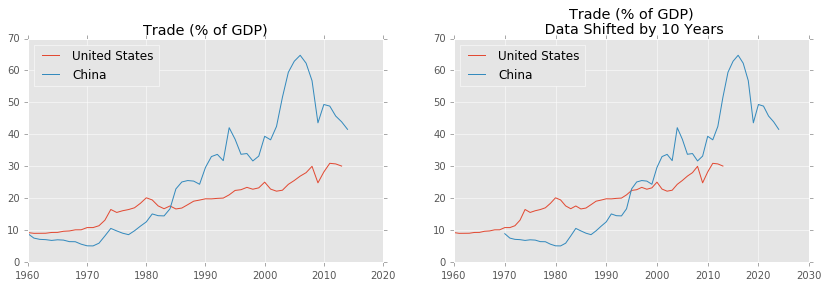

In [9]:
plot_indicator(chosen_indicators[0],delta=10)

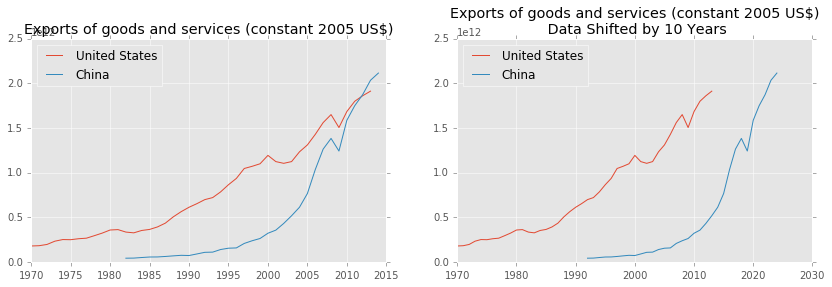

In [10]:
plot_indicator(chosen_indicators[10],delta=10)

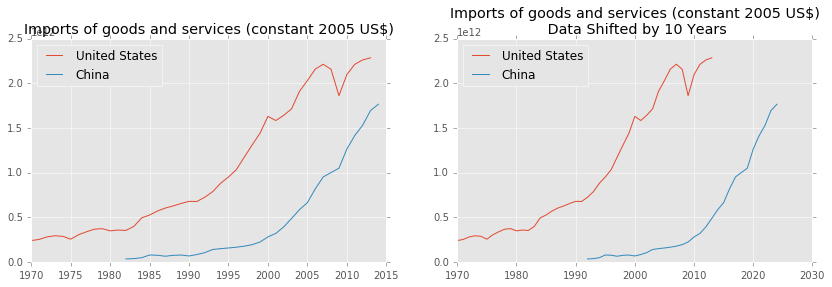

In [11]:
plot_indicator(chosen_indicators[11],delta=10)

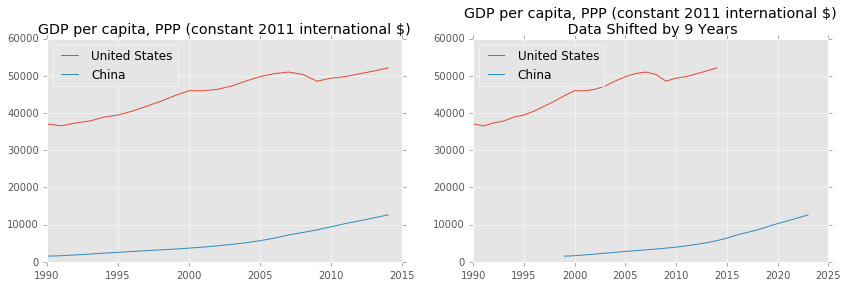

In [12]:
plot_indicator(chosen_indicators[7],delta=9)

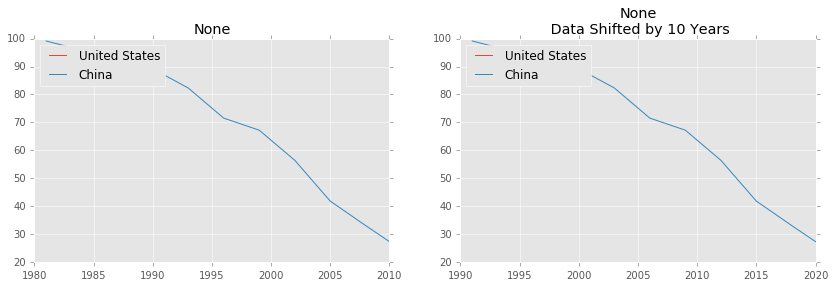

In [13]:
plot_indicator(chosen_indicators[1],delta=10)

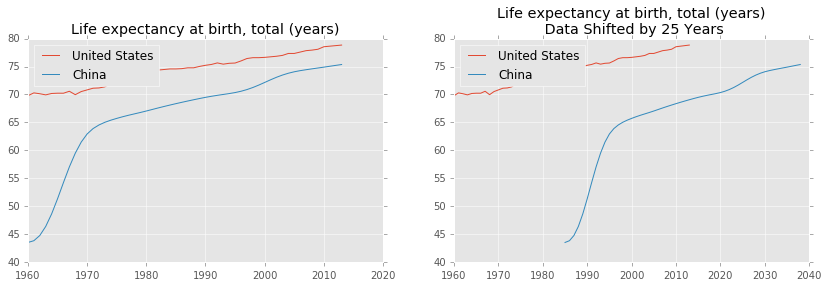

In [14]:
plot_indicator(chosen_indicators[6],delta=25)

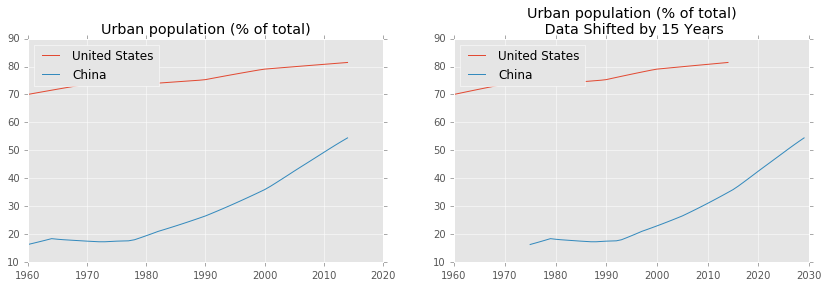

In [15]:
plot_indicator(chosen_indicators[8],delta=15)

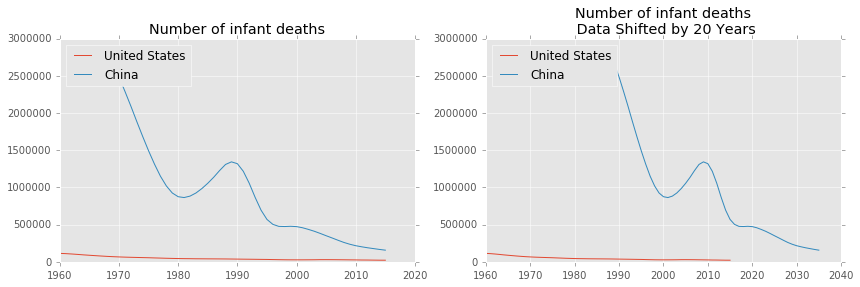

In [16]:
plot_indicator(chosen_indicators[9],delta=20)

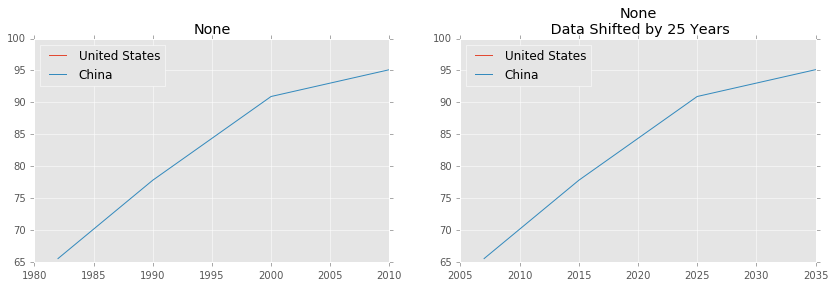

In [17]:
plot_indicator(chosen_indicators[5],delta=25)

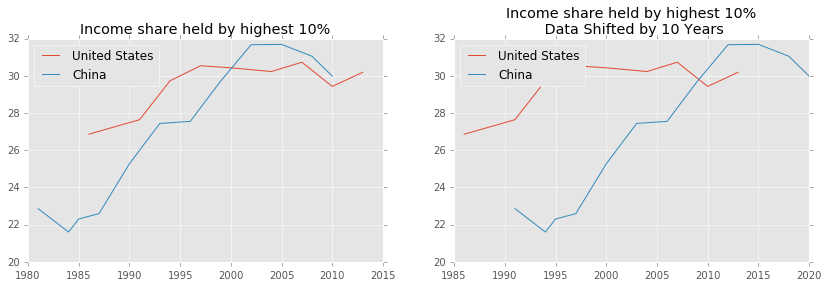

In [18]:
plot_indicator(chosen_indicators[4],delta=10)

In [19]:
import graphlab

In [22]:
indicators=pd.read_csv('C:\Users\Jai\Downloads\world-development-indicators-release-2016-01-28-06-31-53\world-development-indicators\Indicators.csv')


In [23]:
patents = indicators[(indicators.IndicatorCode == 'IP.PAT.RESD') | (indicators.IndicatorCode == 'IP.PAT.NRES')]
patents[:5]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2518,North America,NAC,"Patent applications, nonresidents",IP.PAT.NRES,1960,39417.0
2519,North America,NAC,"Patent applications, residents",IP.PAT.RESD,1960,64596.0
2995,South Asia,SAS,"Patent applications, nonresidents",IP.PAT.NRES,1960,3782.0
2996,South Asia,SAS,"Patent applications, residents",IP.PAT.RESD,1960,721.0
6583,Canada,CAN,"Patent applications, nonresidents",IP.PAT.NRES,1960,22786.0


In [24]:
population = indicators[indicators.IndicatorCode == 'SP.POP.TOTL']
population[:5]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
73,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,9.249590e+07
150,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,1960,4.190810e+06
221,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1960,9.140158e+07
341,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,1960,1.042475e+09
462,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,1960,8.964930e+08


In [25]:
china_tot = patents[patents.CountryName == 'China'].sum()
usa_tot = patents[patents.CountryName == 'United States'].sum()
japan_tot = patents[patents.CountryName == 'Japan'].sum()
korea_tot = patents[patents.CountryName == 'Korea, Rep.'].sum()
uk_tot = patents[patents.CountryName == 'United Kingdom'].sum()
russia_tot = patents[patents.CountryName == 'Russian Federation'].sum()
india_tot = patents[patents.CountryName == 'India'].sum()

# Prepare the input for the graph
vals = np.array([int(china_tot.Value), int(usa_tot.Value), int(japan_tot.Value), int(korea_tot.Value), int(uk_tot.Value), int(russia_tot.Value), int(india_tot.Value)])
countries = np.array(['China', 'USA', 'Japan', 'Korea', 'UK', 'Russia', 'India'])

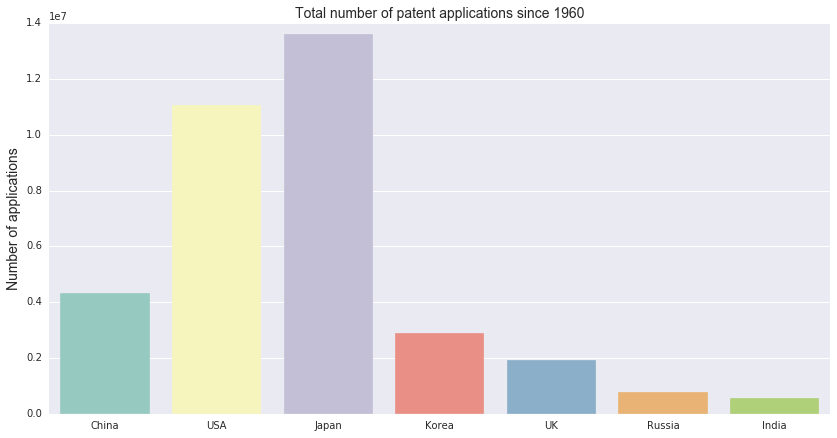

In [27]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.barplot(countries, vals, palette="Set3")
plt.title("Total number of patent applications since 1960", fontsize=14)
plt.ylabel("Number of applications", fontsize=14)

In [28]:
china_tot10 = patents[(patents.CountryName == 'China') & (patents.Year > 2005)].sum()
usa_tot10 = patents[(patents.CountryName == 'United States') & (patents.Year > 2005)].sum()
japan_tot10 = patents[(patents.CountryName == 'Japan') & (patents.Year > 2005)].sum()
korea_tot10 = patents[(patents.CountryName == 'Korea, Rep.') & (patents.Year > 2005)].sum()
uk_tot10 = patents[(patents.CountryName == 'United Kingdom') & (patents.Year > 2005)].sum()
russia_tot10 = patents[(patents.CountryName == 'Russian Federation') & (patents.Year > 2005)].sum()
india_tot10 = patents[(patents.CountryName == 'India') & (patents.Year > 2005)].sum()

# Preparing the input for the graph
vals = np.array([int(china_tot10.Value), int(usa_tot10.Value), int(japan_tot10.Value), int(korea_tot10.Value), int(uk_tot10.Value), int(russia_tot10.Value), int(india_tot10.Value)])

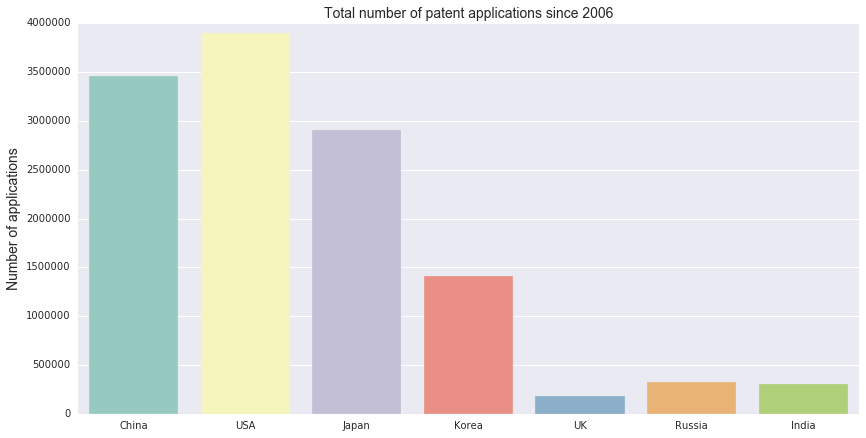

In [29]:
plt.figure(figsize=(14,7))
plt.title("Total number of patent applications since 2006", fontsize=14)
plt.ylabel("Number of applications", fontsize=14)
sns.barplot(countries, vals, palette="Set3")

In [30]:
china_t = patents[patents.CountryName == 'China'].groupby('Year').sum()
usa_t = patents[patents.CountryName == 'United States'].groupby('Year').sum()
japan_t = patents[patents.CountryName == 'Japan'].groupby('Year').sum()
korea_t = patents[patents.CountryName == 'Korea, Rep.'].groupby('Year').sum()
uk_t = patents[patents.CountryName == 'United Kingdom'].groupby('Year').sum()
russia_t = patents[patents.CountryName == 'Russian Federation'].groupby('Year').sum()
india_t = patents[patents.CountryName == 'India'].groupby('Year').sum()

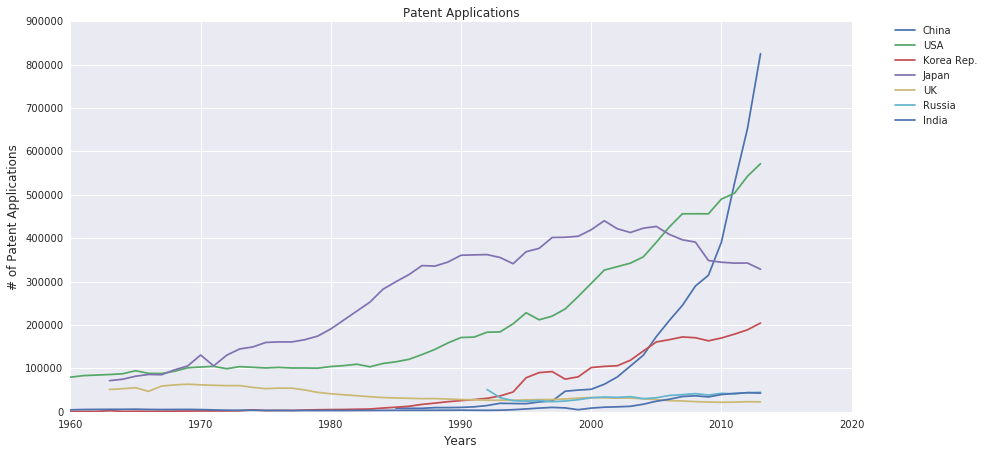

In [31]:
plt.figure(figsize=(14,7))
plt.plot(china_t, label='China')
plt.plot(usa_t, label='USA')
plt.plot(korea_t, label='Korea Rep.')
plt.plot(japan_t, label='Japan')
plt.plot(uk_t, label='UK')
plt.plot(russia_t, label='Russia')
plt.plot(india_t, label='India')
plt.xlabel('Years',  fontsize=12)
plt.ylabel('# of Patent Applications',  fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Patent Applications")

In [32]:
china_pop = population[population.CountryName == 'China'].groupby('Year').sum()
usa_pop = population[population.CountryName == 'United States'].groupby('Year').sum()
japan_pop = population[population.CountryName == 'Japan'].groupby('Year').sum()
korea_pop = population[population.CountryName == 'Korea, Rep.'].groupby('Year').sum()
uk_pop = population[population.CountryName == 'United Kingdom'].groupby('Year').sum()
russia_pop = population[population.CountryName == 'Russia'].groupby('Year').sum()
india_pop = population[population.CountryName == 'India'].groupby('Year').sum()

In [33]:
china100k = pd.merge(china_t, china_pop, left_index=True, right_index=True)
usa100k = pd.merge(usa_t, usa_pop, left_index=True, right_index=True)
japan100k = pd.merge(japan_t, japan_pop, left_index=True, right_index=True)
korea100k = pd.merge(korea_t, korea_pop, left_index=True, right_index=True)
uk100k = pd.merge(uk_t, uk_pop, left_index=True, right_index=True)
russia100k = pd.merge(russia_t, russia_pop, left_index=True, right_index=True)
india100k = pd.merge(india_t, india_pop, left_index=True, right_index=True)

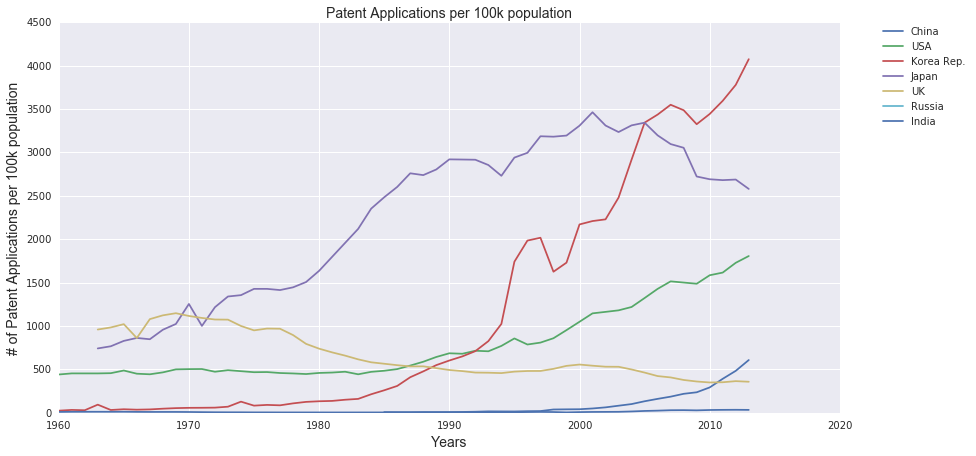

In [34]:
plt.figure(figsize=(14,7))
plt.plot(1e6*china100k.Value_x/china100k.Value_y, label='China')
plt.plot(1e6*usa100k.Value_x/usa100k.Value_y, label='USA')
plt.plot(1e6*korea100k.Value_x/korea100k.Value_y, label='Korea Rep.')
plt.plot(1e6*japan100k.Value_x/japan100k.Value_y, label='Japan')
plt.plot(1e6*uk100k.Value_x/uk100k.Value_y, label='UK')
plt.plot(1e6*russia100k.Value_x/russia100k.Value_y, label='Russia')
plt.plot(1e6*india100k.Value_x/india100k.Value_y, label='India')
plt.xlabel('Years',  fontsize=14)
plt.ylabel('# of Patent Applications per 100k population',  fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Patent Applications per 100k population", fontsize=14)